In [78]:
# Import all Liberies

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix

<H3>Pandas dataframe uses</H3>

In [79]:
# read amd show dataset
df = pd.read_csv("dataset/gender_classification_v7.csv")
df.sample(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
1639,1,11.7,5.1,0,0,1,0,Female
4582,1,11.9,6.5,0,0,0,0,Female
4924,1,12.5,5.1,1,1,1,1,Male
4636,1,14.9,6.1,1,1,1,1,Male
3407,1,13.6,5.9,0,0,0,1,Female


In [80]:
#finding datset
df.shape

(5001, 8)

In [81]:
# find and remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace= True )
df.duplicated().sum()

0

In [82]:
# finding  null values
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [83]:
# finding info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3233 entries, 0 to 4995
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  3233 non-null   int64  
 1   forehead_width_cm          3233 non-null   float64
 2   forehead_height_cm         3233 non-null   float64
 3   nose_wide                  3233 non-null   int64  
 4   nose_long                  3233 non-null   int64  
 5   lips_thin                  3233 non-null   int64  
 6   distance_nose_to_lip_long  3233 non-null   int64  
 7   gender                     3233 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 227.3+ KB


<H3>Seaborn and matplotlib uses</H3>

<Axes: xlabel='forehead_width_cm', ylabel='forehead_width_cm'>

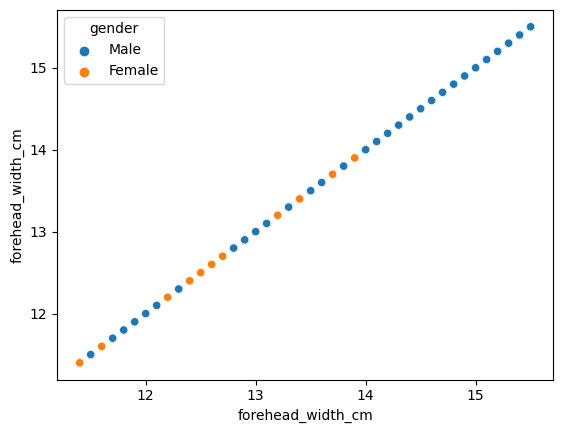

In [84]:
# exploratory data analysis
sns.scatterplot(x = df['forehead_width_cm'] , y = df['forehead_width_cm'] , hue= df['gender'])

<Axes: ylabel='count'>

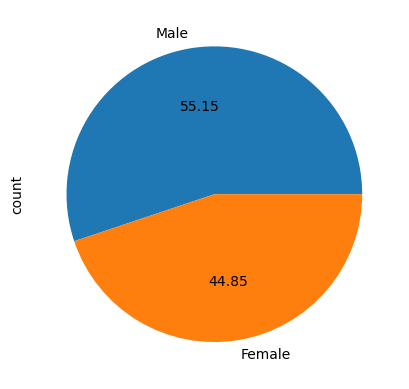

In [85]:
df['gender'].value_counts().plot(kind = 'pie' , autopct = "%.2f" )

<Axes: ylabel='count'>

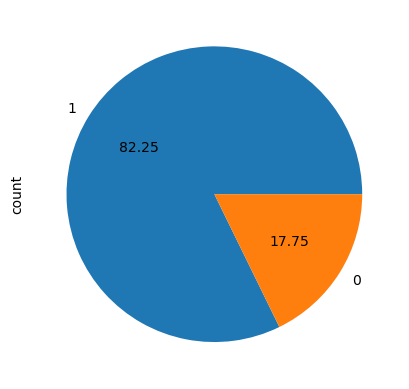

In [86]:
df["long_hair"].value_counts().plot(kind = 'pie' , autopct = "%.2f" )

<Axes: >

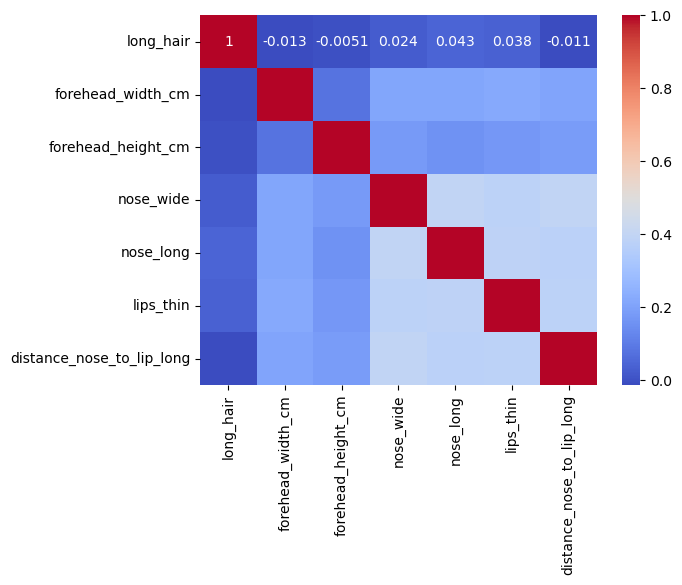

In [87]:
corr = df.select_dtypes("number").corr()
sns.heatmap(corr , annot=True , cmap= "coolwarm")

<H3>Scikit - learn uses</H3>

In [88]:
# train test split
X = df.drop(columns = ['gender'])
y = df['gender']


X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state= 2)

In [89]:
# label encoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
y_test.shape , y_train.shape

((647,), (2586,))

In [90]:
X_train.shape , y_train.shape

((2586, 7), (2586,))

In [91]:
# Train the models

clf = LogisticRegression()
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

print("Accuracy Score : " , accuracy_score(y_test , y_pred))
print("Precision Score : " , precision_score(y_test , y_pred))

Accuracy Score :  0.964451313755796
Precision Score :  0.9644808743169399


In [92]:
# Train the models

clf = DecisionTreeClassifier()
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

print("Accuracy Score : " , accuracy_score(y_test , y_pred))
print("Precision Score : " , precision_score(y_test , y_pred))

Accuracy Score :  0.9443585780525502
Precision Score :  0.947945205479452


In [93]:
# Train the models

clf = RandomForestClassifier()
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

print("Accuracy Score : " , accuracy_score(y_test , y_pred))
print("Precision Score : " , precision_score(y_test , y_pred))

Accuracy Score :  0.9613601236476044
Precision Score :  0.9642857142857143


[[271  13]
 [ 12 351]]


<Axes: >

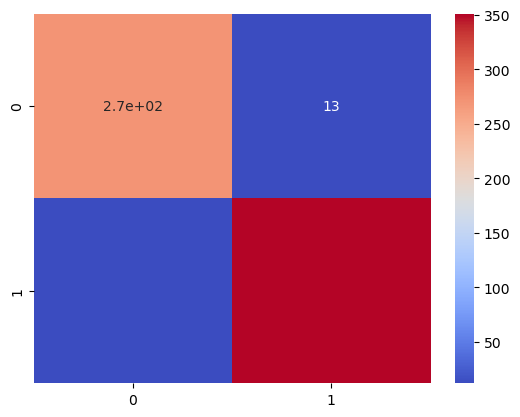

In [95]:
# confusion matrix for RRandomForestClassifier
con = confusion_matrix(y_test , y_pred)
print(con)
sns.heatmap(con , annot=True , cmap= "coolwarm")